In [97]:
%matplotlib inline

In [110]:
import pandas as pd #Manejo de datos tabulados
import numpy as np #Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt #Graficos de datos
import seaborn as sns #Graficos estadisticos
import pandas_profiling as ppr  #
from fitter import fitter #Ajustes de distribuciones de probs

In [ ]:
sns.set_theme(style="whitegrid")

In [99]:
##Leemos los datos seleccionados
df_main=pd.read_csv('../DATA/TB_HOSP_VAC_FALLECIDOS.csv')
df_oxigen=pd.read_csv('../DATA/Oxigeno_25-10-2021.csv',sep="|")

In [100]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137449 entries, 0 to 137448
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   eess_renaes                   137449 non-null  int64  
 1   eess_diresa                   137449 non-null  object 
 2   eess_red                      137449 non-null  object 
 3   eess_nombre                   137449 non-null  object 
 4   id_eess                       137449 non-null  int64  
 5   id_persona                    137449 non-null  int64  
 6   edad                          129401 non-null  float64
 7   sexo                          130398 non-null  object 
 8   fecha_ingreso_hosp            137449 non-null  object 
 9   flag_uci                      137449 non-null  int64  
 10  fecha_ingreso_uci             13114 non-null   object 
 11  fecha_ingreso_ucin            7016 non-null    object 
 12  con_oxigeno                   137444 non-nul

In [101]:
df_oxigen.head()

,FECHACORTE,FECHAREGISTRO,CODIGO,NOMBRE,CATEGORIA,NIVEL,INSTITUCIÓN,GRUPO,SUB_GRUPO,MACROREGIONES,...,TOT_PUNTOS_RED_INOPER_HOSP,TOT_PUNTOS_RED_EMER,TOT_PUNTOS_RED_OPER_EMER,TOT_PUNTOS_RED_INOPER_EMER,TOT_PUNTOS_RED_AHT,TOT_PUNTOS_RED_OPER_AHT,TOT_PUNTOS_RED_INOPER_AHT,TOT_PUNTOS_RED_AACT,TOT_PUNTOS_RED_OPER_AACT,TOT_PUNTOS_RED_INOPER_AACT
0,20210330,2021/03/30 11:14:29 PM,15266.0,CLINICA Y BOTICA SAN JUAN,II-1,Nivel 2,PRIVADO,PRIVADOS,PRIVADOS,Zona Norte,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210331,2021/03/31 6:11:05 AM,9748.0,HOSPITAL I OXAPAMPA,II-1,Nivel 2,ESSALUD,PÚBLICOS,ESSALUD,Zona Centro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210331,2021/03/31 6:30:00 AM,10244.0,HOSPITAL II JORGE REATEGUI DELGADO,II-1,Nivel 2,ESSALUD,PÚBLICOS,ESSALUD,Zona Norte,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210331,2021/03/31 7:22:06 AM,10533.0,"HOSPITAL II LIMA NORTE CALLAO ""LUIS NEGREIROS ...",II-2,Nivel 2,ESSALUD,PÚBLICOS,ESSALUD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210331,2021/03/31 7:25:06 AM,13911.0,MARIA REICHE NEUMAN,I-3,Nivel 1,ESSALUD,PÚBLICOS,ESSALUD,Zona Sur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df_oxigen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101587 entries, 0 to 101586
Data columns (total 100 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   FECHACORTE                          101587 non-null  int64  
 1   FECHAREGISTRO                       101587 non-null  object 
 2   CODIGO                              101405 non-null  float64
 3   NOMBRE                              101404 non-null  object 
 4   CATEGORIA                           101404 non-null  object 
 5   NIVEL                               101404 non-null  object 
 6   INSTITUCIÓN                         101404 non-null  object 
 7   GRUPO                               101404 non-null  object 
 8   SUB_GRUPO                           101404 non-null  object 
 9   MACROREGIONES                       71292 non-null   object 
 10  UBIGEO                              101404 non-null  float64
 11  REGION                   

In [111]:
# Validar integridad del identificador único
len(df_main['id_persona'].unique()),df_main.shape[0]

(136982, 137449)

In [105]:
#Nulos en id_persona
df_main['id_persona'].isna().sum()

0

In [106]:
#Conteo de cuantas veces se duplican los id_persona
filtro_duplicados = df_main['id_persona'].duplicated(keep=False)
df_main[filtro_duplicados]['id_persona'].value_counts().head()

29048330    3
26422634    3
6054506     3
16947420    2
2857158     2
Name: id_persona, dtype: int64

In [107]:
#TODO :Crear variable si fue reinfección(0,1)
#TODO: Crear variable si con el # de la reinfección (1,2,3,etc)

In [108]:
edad_na_count= df_main ['edad'].isna().sum()
print(edad_na_count)
print(round(edad_na_count/df_main.shape[0]*100,2),'%')

8048
5.86 %


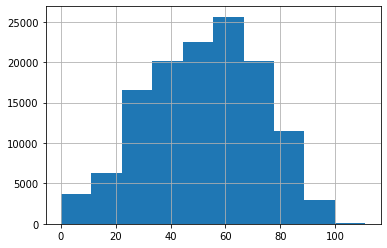

In [109]:
df_main ['edad'].hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

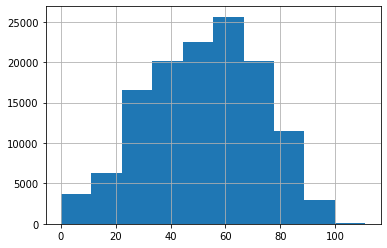

In [112]:
df_main['edad'].hist ()
plt.show

In [113]:
df_main['edad'].describe()

count    129401.000000
mean         52.132379
std          20.468480
min           0.000000
25%          37.000000
50%          54.000000
75%          68.000000
max         111.000000
Name: edad, dtype: float64

In [116]:
#grupos de edad
counts,bins=np.histogram(df_main['edad'].dropna().values,bins=6)
bins

array([  0. ,  18.5,  37. ,  55.5,  74. ,  92.5, 111. ])

In [134]:
edad_bins= pd.cut(df_main['edad'],bins=[0,5,13,18,25,40,55,65,80,95,112])
edad_bins_count= edad_bins.value_counts()

In [137]:
edad_bins_count

(40, 55]     29736
(65, 80]     26333
(25, 40]     25616
(55, 65]     23456
(80, 95]     10021
(18, 25]      7559
(5, 13]       2244
(13, 18]      1973
(0, 5]        1964
(95, 112]      454
Name: edad, dtype: int64

<AxesSubplot:>

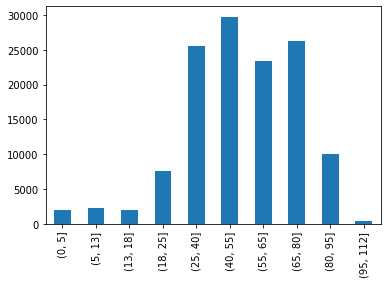

In [138]:
edad_bins_count.sort_index().plot(kind='bar')

In [142]:
#agregamos esto para crear la columna de edad bins en la tabla
df_main['edad_bins']=edad_bins

In [139]:
#Valores perdidos /missings
df_main['sexo'].isna().sum(),df_main['sexo'].isna().sum()/df_main.shape[0]
#no es muy grande no es un gran problema

(7051, 0.051299027275571306)

In [140]:
df_main['sexo'].value_counts(),df_main['sexo'].value_counts(normalize=True)

(M    69486
 F    60912
 Name: sexo, dtype: int64,
 M    0.532876
 F    0.467124
 Name: sexo, dtype: float64)

In [179]:
conteo_edad_x_sexo=(df_main[['edad_bins','sexo']].dropna() #Selección de colums y elimino NaNs
                   .groupby(['edad_bins','sexo']).size() #Agrupo y cuento las obs. por intervalo de edad y sexo.
                   .reset_index() #Convierte a data frame
                   .rename({0:'conteo'},axis=1)) #Cambia el noombre de "0" a conteo"
conteo_edad_x_sexo.head()

,edad_bins,sexo,conteo
0,"(0, 5]",F,862
1,"(0, 5]",M,1102
2,"(5, 13]",F,944
3,"(5, 13]",M,1300
4,"(13, 18]",F,1334


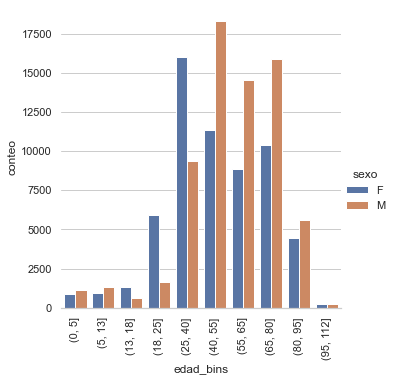

In [180]:
#Gráfica de barras de cantidad de personas por intervalo de edad en cada genero
g= sns.catplot(
    data=conteo_edad_x_sexo ,kind="bar",
    x="edad_bins" ,y="conteo", hue ="sexo", 
)
g.despine(left=True)
g.set_xticklabels(rotation=90)

In [ ]:
# Podemos sacar del grafico que los hospitalizados desde las edades de 25-40 son hospitalizadas las mujeres y de ahi se cambia a mayoria hombres.